정책 shape: (7749, 41)
CBM shape: (11682, 3)
CBM 컬럼: ['pid', 'cbm_p_success', 'cbm_pred']
✅ CBM 필수 컬럼 OK
정책에는 있으나 CBM 없는 pid 수: 0
count    11682.000000
mean         0.167473
std          0.235159
min          0.000072
25%          0.019458
50%          0.063112
75%          0.209898
max          0.999612
Name: cbm_p_success, dtype: float64


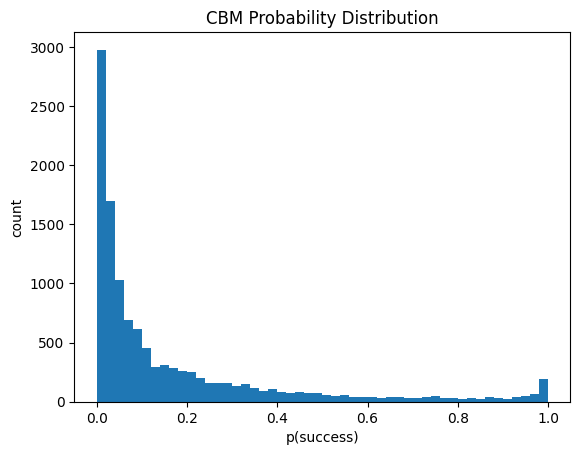

In [5]:
# ① 데이터 로드 + pid 생성
import pandas as pd
import matplotlib.pyplot as plt

# 경로
POLICY_PATH = "../results/oxju/policy_matrix_final.csv"
CBM_PATH    = "../results/RYUI/cbm_predictions.csv"

# 로드
df_policy = pd.read_csv(POLICY_PATH)
df_cbm    = pd.read_csv(CBM_PATH)

# pid = row_id (둘 다 동일 규칙)
df_policy = df_policy.reset_index(drop=True)
df_policy["pid"] = df_policy.index

df_cbm = df_cbm.reset_index(drop=True)
df_cbm["pid"] = df_cbm.index

print("정책 shape:", df_policy.shape)
print("CBM shape:", df_cbm.shape)

# ① 데이터 로드 + pid 생성
required_cols = {"pid", "cbm_p_success", "cbm_pred"}
print("CBM 컬럼:", df_cbm.columns.tolist())

assert required_cols.issubset(df_cbm.columns), "❌ CBM 필수 컬럼 누락"
print("✅ CBM 필수 컬럼 OK")


# 02_1 - ③ pid 누락 체크
missing = set(df_policy["pid"]) - set(df_cbm["pid"])
print("정책에는 있으나 CBM 없는 pid 수:", len(missing))


# 02_1 - ④ CBM 확률 분포 확인
print(df_cbm["cbm_p_success"].describe())

plt.hist(df_cbm["cbm_p_success"], bins=50)
plt.title("CBM Probability Distribution")
plt.xlabel("p(success)")
plt.ylabel("count")
plt.show()

